<a href="https://www.kaggle.com/code/callumrafter/displaying-bitcoin-block-data?scriptVersionId=120838068" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Displaying Bitcoin Block Data

<a id="section-one"></a>
# 1. Introduction
This notebook will show example visualization of the data on the Bitcoin blockchain using the [Bitcoin Block Data](https://www.kaggle.com/datasets/callumrafter/bitcoin-block-data) dataset.

It will be split into 3 main parts:
* [Importing Required Modules and the Dataset](#section-two)
* [Data Familiarization](#section-three)
* [Data Visualization](#section-four)

<a id="section-two"></a>
# 2. Importing Required Modules and the Dataset

In [1]:
# Standard library modules
import os
import datetime

# Third party modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [2]:
# Import the dataset as a Pandas DataFrame
dataset = '/kaggle/input/bitcoin-block-data/BlockData.csv'
df = pd.read_csv(dataset, low_memory=False)

<a id="section-three"></a>
# 3. Data Familiarization

In [3]:
# Show the column headers
print(df.columns.values)

['Block Height' 'Block Reward' 'Coinbase' 'Time' 'Median Time'
 'Difficulty' 'Chainwork' 'nTx' 'Stripped Size' 'Size' 'Weight']


In [4]:
# Show general structural information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759488 entries, 0 to 759487
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Block Height   759488 non-null  int64  
 1   Block Reward   759488 non-null  float64
 2   Coinbase       759487 non-null  float64
 3   Time           759488 non-null  int64  
 4   Median Time    759488 non-null  int64  
 5   Difficulty     759488 non-null  float64
 6   Chainwork      759488 non-null  object 
 7   nTx            759488 non-null  int64  
 8   Stripped Size  759488 non-null  int64  
 9   Size           759488 non-null  int64  
 10  Weight         759488 non-null  int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 63.7+ MB


In [5]:
# Show the first 10 values
df.head(10)

,Block Height,Block Reward,Coinbase,Time,Median Time,Difficulty,Chainwork,nTx,Stripped Size,Size,Weight
0,0,50.0,NaN,1231006505,1231006505,1.0,4295032833,1,285,285,1140
1,1,50.0,50.0,1231469665,1231469665,1.0,8590065666,1,215,215,860
2,2,50.0,50.0,1231469744,1231469665,1.0,12885098499,1,215,215,860
3,3,50.0,50.0,1231470173,1231469744,1.0,17180131332,1,215,215,860
4,4,50.0,50.0,1231470988,1231469744,1.0,21475164165,1,215,215,860
5,5,50.0,50.0,1231471428,1231470173,1.0,25770196998,1,215,215,860
6,6,50.0,50.0,1231471789,1231470173,1.0,30065229831,1,215,215,860
7,7,50.0,50.0,1231472369,1231470988,1.0,34360262664,1,215,215,860
8,8,50.0,50.0,1231472743,1231470988,1.0,38655295497,1,215,215,860
9,9,50.0,50.0,1231473279,1231471428,1.0,42950328330,1,215,215,860


In [6]:
# Show the last 10 values
df.tail(10)

,Block Height,Block Reward,Coinbase,Time,Median Time,Difficulty,Chainwork,nTx,Stripped Size,Size,Weight
759478,759478,6.25,6.286014,1666247530,1666243349,3.561079e+13,17188893725745866066008449782,1517,766609,1693085,3992912
759479,759479,6.25,6.330412,1666248337,1666245094,3.561079e+13,17189046675276011247566809680,2256,709499,1454552,3583049
759480,759480,6.25,6.285219,1666248669,1666245523,3.561079e+13,17189199624806156429125169578,990,351402,753129,1807335
759481,759481,6.25,6.263076,1666248766,1666246020,3.561079e+13,17189352574336301610683529476,230,104863,287250,601839
759482,759482,6.25,6.319849,1666249434,1666247260,3.561079e+13,17189505523866446792241889374,1794,771522,1587701,3902267
759483,759483,6.25,6.323000,1666250157,1666247530,3.561079e+13,17189658473396591973800249272,1966,609141,1183209,3010632
759484,759484,6.25,6.326180,1666250561,1666248337,3.561079e+13,17189811422926737155358609170,1157,411984,769301,2005253
759485,759485,6.25,6.261039,1666250707,1666248669,3.561079e+13,17189964372456882336916969068,401,85873,164346,421965
759486,759486,6.25,6.368605,1666251866,1666248766,3.561079e+13,17190117321987027518475328966,2713,790664,1621456,3993448
759487,759487,6.25,6.311884,1666252295,1666249434,3.561079e+13,17190270271517172700033688864,1965,722870,1355570,3524180


In [7]:
# Show common statistical attributes
df.describe()

,Block Height,Block Reward,Coinbase,Time,Median Time,Difficulty,nTx,Stripped Size,Size,Weight
count,759488.000000,759488.000000,759487.000000,7.594880e+05,7.594880e+05,7.594880e+05,759488.00000,759488.000000,7.594880e+05,7.594880e+05
mean,379743.500000,25.259459,25.599379,1.448364e+09,1.448361e+09,5.269814e+12,1018.57849,449459.111777,5.705140e+05,1.918891e+06
std,219245.444961,16.609911,16.415284,1.227192e+08,1.227192e+08,8.746498e+12,1045.22084,407282.365726,5.490163e+05,1.746618e+06
min,0.000000,6.250000,0.000000,1.231007e+09,1.231007e+09,1.000000e+00,1.00000,176.000000,1.760000e+02,7.040000e+02
25%,189871.750000,12.500000,12.647546,1.342750e+09,1.342746e+09,1.888787e+06,54.00000,25605.750000,2.626400e+04,1.035760e+05
50%,379743.500000,25.000000,25.029889,1.445344e+09,1.445340e+09,6.088383e+10,579.00000,309038.500000,3.484570e+05,1.288792e+06
75%,569615.250000,50.000000,50.000000,1.554049e+09,1.554047e+09,7.019199e+12,1973.00000,900853.000000,1.057912e+06,3.992947e+06
max,759487.000000,50.000000,316.532751,1.666252e+09,1.666249e+09,3.561079e+13,12239.00000,1000000.000000,2.765062e+06,4.000000e+06


<a id="section-four"></a>
# 4. Data Visualization

In [8]:
# Formatting functions that will allow us to change the displayed ticks
def FormatMinutes (x, pos):
    '''Format values such that 60->1.'''
    return '%1.0f' % (x / 60)

def FormatThousands (x, pos):
    '''Format values such that 1000->1.'''
    return '%1.0f' % (x * 1e-3)

def FormatMillions (x, pos):
    '''Format values such that 1000000->1.'''
    return '%1.0f' % (x * 1e-6)

## 4.1. Time To Mine Each Bitcoin Block

/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


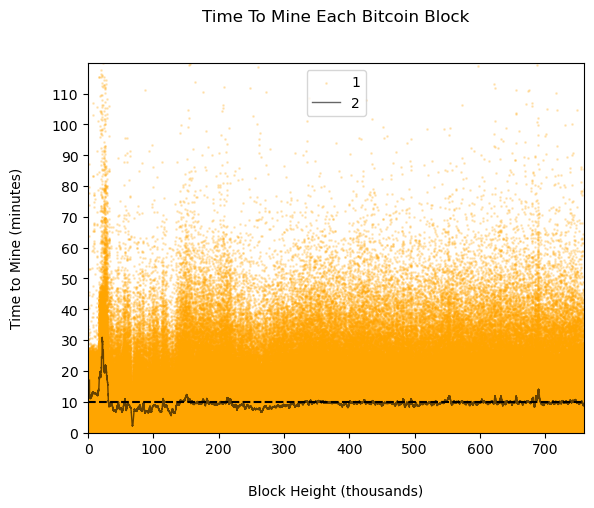

In [9]:
# Data selection
x = df['Block Height']
y = df['Time'].diff()
average = df['Time'].diff().rolling(2016).mean()

# Plot construction
fig, ax = plt.subplots()
plt.scatter(x, y, color='orange', s=1, alpha=0.2)
plt.plot(average, color='black', alpha=0.6, linewidth=1)
ax.legend(['1', '2', '3'])

# Plot configuration
plt.title('Time To Mine Each Bitcoin Block', pad=30)
ax.set_xlabel('Block Height (thousands)', labelpad=20)
ax.xaxis.set_major_formatter(FuncFormatter(FormatThousands))
plt.xlim([0, len(df['Block Height'])])
ax.set_ylabel('Time to Mine (minutes)', labelpad=20)
ax.yaxis.set_major_formatter(FuncFormatter(FormatMinutes))
plt.yticks(np.arange(1, 7200, step=600))
plt.ylim([1,7200])
plt.axhline(y=600, color='black', linestyle='--')

## 4.2. Size of Each Bitcoin Block

(0.0, 3.0)

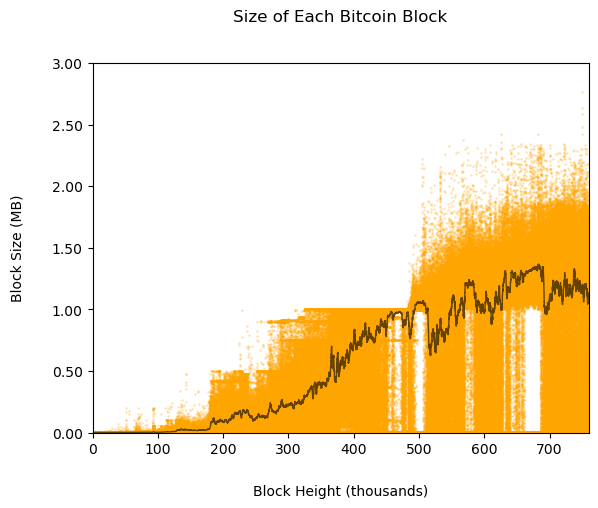

In [10]:
# Data selection
x = df['Block Height']
y = df['Size'] / 10**6
average = df['Size'].rolling(2016).mean() / 10**6

# Plot construction
fig, ax = plt.subplots()
plt.scatter(x, y, color='orange', s=1, alpha=0.2)
plt.plot(average, color='black', alpha=0.6, linewidth=1)

# Plot configuration
plt.title('Size of Each Bitcoin Block', pad=30)
ax.set_xlabel('Block Height (thousands)', labelpad=20)
ax.xaxis.set_major_formatter(FuncFormatter(FormatThousands))
plt.xlim([0, len(df['Block Height'])])
ax.set_ylabel('Block Size (MB)', labelpad=20)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.yticks(np.arange(0, 3.1, step=0.5))
plt.ylim([0, 3])

## 4.3. Weight of Each Bitcoin Block

(1.0, 4000000.0)

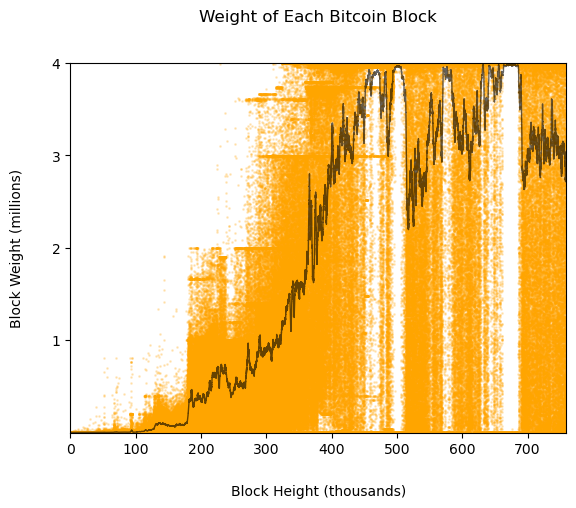

In [11]:
# Data selection
x = df['Block Height']
y = df['Weight']
average = df['Weight'].rolling(2016).mean()

# Plot construction
fig, ax = plt.subplots()
plt.scatter(x, y, color='orange', s=1, alpha=0.2)
plt.plot(average, color='black', alpha=0.6, linewidth=1)

# Plot configuration
plt.title('Weight of Each Bitcoin Block', pad=30)
ax.set_xlabel('Block Height (thousands)', labelpad=20)
ax.xaxis.set_major_formatter(FuncFormatter(FormatThousands))
plt.xlim([0, len(df['Block Height'])])
ax.set_ylabel('Block Weight (millions)', labelpad=20)
ax.yaxis.set_major_formatter(FuncFormatter(FormatMillions))
plt.yticks(np.arange(0, (4*10**6) + 1, step=10**6))
plt.ylim([1, 4*10**6])

## 4.4. Difficulty of Each Bitcoin Block

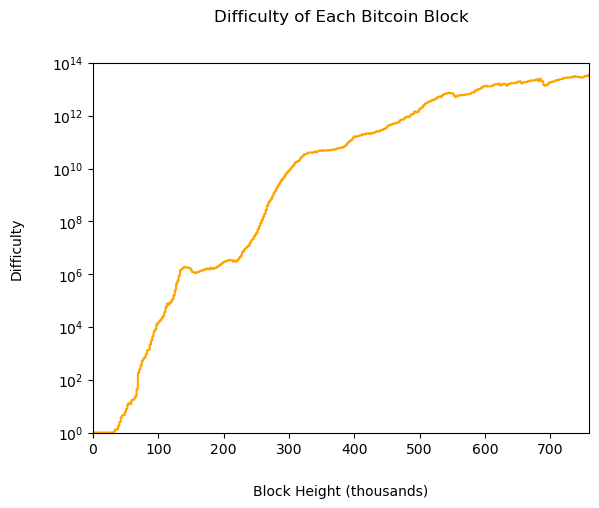

In [12]:
# Data selection
x = df['Block Height']
y = df['Difficulty']

# Plot construction
fig, ax = plt.subplots()
ax.plot(x, y, color='orange')

# Plot configuration
plt.title('Difficulty of Each Bitcoin Block', pad=30)
ax.set_xlabel('Block Height (thousands)', labelpad=20)
ax.xaxis.set_major_formatter(FuncFormatter(FormatThousands))
plt.xlim([0, len(df['Block Height'])])
ax.set_ylabel('Difficulty', labelpad=20)
ax.yaxis.set_major_formatter(FuncFormatter(FormatMillions))
plt.ylim([1, 10**14])
plt.yscale('log')

## 4.5. Number of Transactions in Each Bitcoin Block

(1.0, 6000.0)

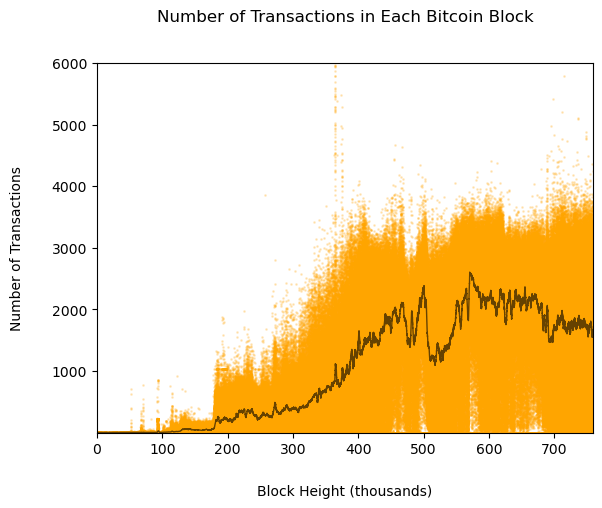

In [13]:
# Data selection
x = df['Block Height']
y = df['nTx']
average = df['nTx'].rolling(2016).mean()

# Plot construction
fig, ax = plt.subplots()
plt.scatter(x, y, color='orange', s=1, alpha=0.2)
plt.plot(average, color='black', alpha=0.6, linewidth=1)

# Plot configuration
plt.title('Number of Transactions in Each Bitcoin Block', pad=30)
ax.set_xlabel('Block Height (thousands)', labelpad=20)
ax.xaxis.set_major_formatter(FuncFormatter(FormatThousands))
plt.xlim([0, len(df['Block Height'])])
ax.set_ylabel('Number of Transactions', labelpad=20)
plt.ylim([1, 6*10**3])

## 4.6. Total Number of Transactions on the Bitcoin Blockchain

(1.0, 1000000000.0)

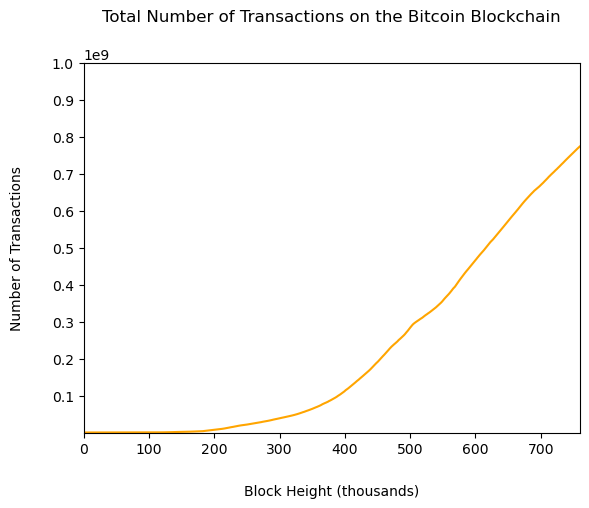

In [14]:
# Data selection
x = df['Block Height']
y = df['nTx'].cumsum()

# Plot construction
fig, ax = plt.subplots()
ax.plot(x, y, color='orange')

# Plot configuration
plt.title('Total Number of Transactions on the Bitcoin Blockchain', pad=30)
ax.set_xlabel('Block Height (thousands)', labelpad=20)
ax.xaxis.set_major_formatter(FuncFormatter(FormatThousands))
plt.xlim([0, len(df['Block Height'])])
ax.set_ylabel('Number of Transactions', labelpad=20)
plt.yticks(np.arange(0, (10**9) + 1, step=10**8))
plt.ylim([1, 10**9])

## 4.7. Bitcoin Issuance Schedule

(0.0, 21000000.0)

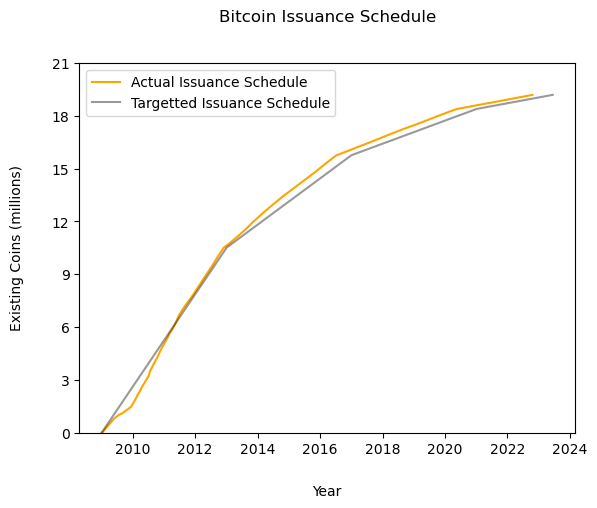

In [15]:
genesis_time = df['Time'].iloc[0]
actual_block_date = []
target_block_date = []

# Get block timestamps for actual issuance schedule 
for i in df['Time']:
    actual_block_date.append(datetime.datetime.fromtimestamp(i))
    
# Get block timestamps for targetted issuance schedule where a block is created on average every 10 minutes or 600 seconds from the genesis (initial) block.
for i in df['Block Height']:
    target_block_date.append(datetime.datetime.fromtimestamp(genesis_time + (i * 600)))
    
# Data selection
x = actual_block_date
x2 = target_block_date
y = df['Block Reward'].cumsum()

# Plot construction
fig, ax = plt.subplots()
ax.plot(x, y, color='orange')
ax.plot(x2, y, color='black', alpha=0.4)
ax.legend(['Actual Issuance Schedule', 'Targetted Issuance Schedule'])

# Plot configuration
plt.title('Bitcoin Issuance Schedule', pad=30)
ax.set_xlabel('Year', labelpad=20)
ax.set_ylabel('Existing Coins (millions)', labelpad=20)
ax.yaxis.set_major_formatter(FuncFormatter(FormatMillions))
plt.yticks(np.arange(0, (21*10**6)+1, step=(21*10**6)/7))
plt.ylim([0, 21*10**6])

## 4.8. Average Transaction Fee in Each Bitcoin Block

(0.0, 0.01401)

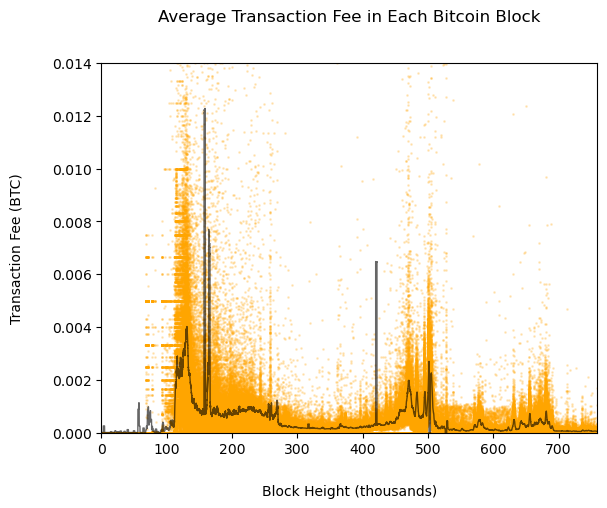

In [16]:
# Data selection
x = df['Block Height']
y = (df['Coinbase'] - df['Block Reward']) / df['nTx']
average = ((df['Coinbase'] - df['Block Reward']) / df['nTx']).rolling(2016).mean()

# Plot construction
fig, ax = plt.subplots()
plt.scatter(x, y, color='orange', s=1, alpha=0.2)
plt.plot(average, color='black', alpha=0.6, linewidth=1)

# Plot configuration
plt.title('Average Transaction Fee in Each Bitcoin Block', pad=30)
ax.set_xlabel('Block Height (thousands)', labelpad=20)
ax.xaxis.set_major_formatter(FuncFormatter(FormatThousands))
plt.xlim([0, len(df['Block Height'])])
ax.set_ylabel('Transaction Fee (BTC)', labelpad=20)
plt.ylim([0, 0.01401])

## 4.9. Sum of Transaction Fees in Each Bitcoin Block

(0.0, 16.0)

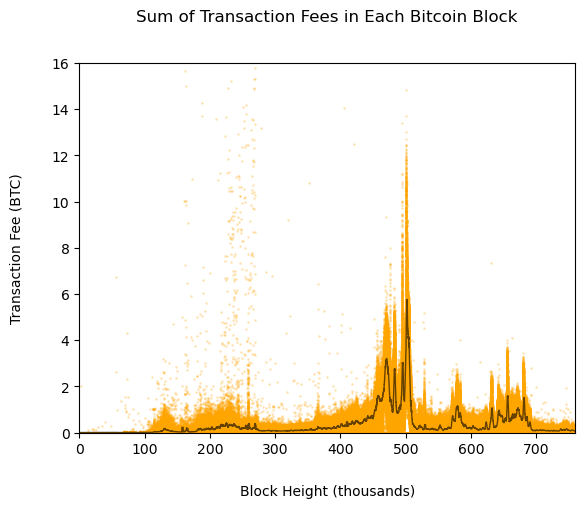

In [17]:
# Data selection
x = df['Block Height']
y = (df['Coinbase'] - df['Block Reward'])
average = (df['Coinbase'] - df['Block Reward']).rolling(2016).mean()

# Plot construction
fig, ax = plt.subplots()
plt.scatter(x, y, color='orange', s=1, alpha=0.2)
plt.plot(average, color='black', alpha=0.6, linewidth=1)

# Plot configuration
plt.title('Sum of Transaction Fees in Each Bitcoin Block', pad=30)
ax.set_xlabel('Block Height (thousands)', labelpad=20)
ax.xaxis.set_major_formatter(FuncFormatter(FormatThousands))
plt.xlim([0, len(df['Block Height'])])
ax.set_ylabel('Transaction Fee (BTC)', labelpad=20)
plt.ylim([0, 16])

## 4.10. Sum of Transaction Fees in Each Bitcoin Block as a % of the Coinbase Amount

(0.0, 100.1)

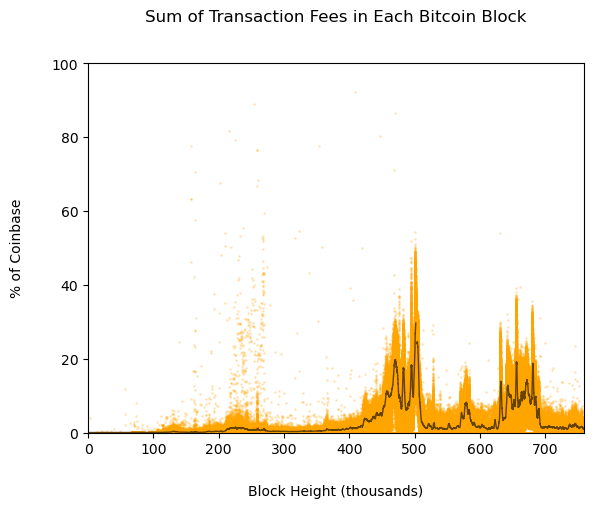

In [18]:
# Data selection
x = df['Block Height']
y = (1 - (df['Block Reward'] / df['Coinbase'])) * 100
average = (1 - (df['Block Reward'] / df['Coinbase'])).rolling(2016).mean() * 100

# Plot construction
fig, ax = plt.subplots()
plt.scatter(x, y, color='orange', s=1, alpha=0.2)
plt.plot(average, color='black', alpha=0.6, linewidth=1)

# Plot configuration
plt.title('Sum of Transaction Fees in Each Bitcoin Block', pad=30)
ax.set_xlabel('Block Height (thousands)', labelpad=20)
ax.xaxis.set_major_formatter(FuncFormatter(FormatThousands))
plt.xlim([0, len(df['Block Height'])])
ax.set_ylabel('% of Coinbase', labelpad=20)
plt.ylim([0, 100.1])

## 4.11. A chart to show the coinbase amount in each Bitcoin block


(0.0, 74.84523169405135)

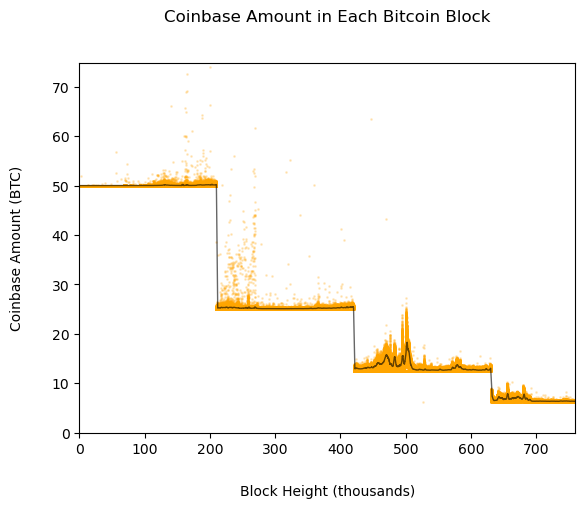

In [19]:
# Data selection
x = df['Block Height']
y = df['Coinbase']
average = df['Coinbase'].rolling(2016).mean()

# Plot construction
fig, ax = plt.subplots()
plt.scatter(x, y, color='orange', s=1, alpha=0.2)
plt.plot(average, color='black', alpha=0.6, linewidth=1)

# Plot configuration
plt.title('Coinbase Amount in Each Bitcoin Block', pad=30)
ax.set_xlabel('Block Height (thousands)', labelpad=20)
ax.xaxis.set_major_formatter(FuncFormatter(FormatThousands))
plt.xlim([0, len(df['Block Height'])])
ax.set_ylabel('Coinbase Amount (BTC)', labelpad=20)
plt.ylim([0, df['Coinbase'].mean() + (df['Coinbase'].std() * 3)])